In [3]:
import pandas as pd
import numpy as np 
from keras.models import Sequential 
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from math import sqrt
from sklearn.model_selection import cross_val_predict
import os
from  matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

In [4]:
dataframe = pd.read_csv('big_five_scores.csv')
dataframe = dataframe.fillna(value=0)

In [10]:
def model() :
    model = Sequential()
    model.add(Dense(30, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [29]:
def NeuralNets(trait):
    X = dataframe.loc['agreeable_score','extraversion','opennes_score'].values
    Y = dataframe.loc['neuroticism'].values

In [30]:
seed=7
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=model, nb_epoch=300, batch_size=50 , verbose=0)))

In [31]:
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=4, random_state=seed, shuffle=True)

In [32]:
predicted =cross_val_predict(pipeline,X,Y,cv=kfold)

NameError: name 'X' is not defined

NameError: name 'Y' is not defined

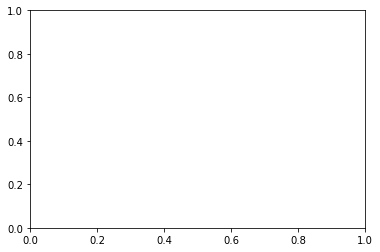

In [36]:
fig, ax = plt.subplots()
ax.scatter(Y,predicted, edgecolors=(0, 0, 0))
ax.plot([0, 1], [0, 1], 'k--', lw=2)
ax.set_xlabel('Actual Values (Big Five PreSurvey)')
ax.set_ylabel('Predicted Values')
plt.title("Neural Networks - "+trait)
plt.show()
return(sqrt(mean_squared_error(Y.predicted))*100)

In [37]:
traits=['Openness','Conscientiousness','Extraversion','Agreeableness','Neuroticism']

In [38]:
for train in traits:
    print(trait,NeuralNets(trait))

NameError: name 'trait' is not defined